In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Percentiles

In [2]:
v = [1, 7, 3, 9, 5]
v

[1, 7, 3, 9, 5]

In [3]:
v = [1, 7, 3, 9, 5]
percentile(20, v)

1

In [4]:
v = [1, 7, 3, 9, 5]
percentile(10, v)

1

In [5]:
v = [1, 7, 3, 9, 5]
percentile(50, v)

5

In [6]:
v = [1, 7, 3, 9, 5]
percentile(39, v) == percentile(40, v)

True

In [7]:
v = [1, 7, 3, 9, 5]
percentile(40, v) == percentile(41, v)

False

In [8]:
v = [1, 7, 3, 9, 5]
percentile(40, v)

3

In [ ]:
Table(['Percent', 'Percentile']).with_rows([
   [ 1, percentile( 1, v)], 
   [10, percentile(10, v)], 
   [20, percentile(20, v)], 
   [39, percentile(39, v)], 
   [40, percentile(40, v)], 
   [41, percentile(41, v)], 
   [50, percentile(50, v)], 
])

## Estimation

In [9]:
sf = Table.read_table('san_francisco_2015.csv').select(3, 11, 21)
sf.set_format('Total Compensation', NumberFormatter(0))


Organization Group                       | Job                            | Total Compensation
Public Works, Transportation & Commerce  | Water Qualitytech I/II         | 117,767
Public Works, Transportation & Commerce  | Soft Floor Coverer             | 41,210
Community Health                         | Health Care Billing Clerk 2    | 110,561
Community Health                         | Food Service Mgr Administrator | 38,625
Public Works, Transportation & Commerce  | School Crossing Guard          | 11,438
Public Protection                        | Police Officer                 | 3,189
Community Health                         | Nurse Practitioner             | 260,281
Public Works, Transportation & Commerce  | Transit Operator               | 111,057
General Administration & Finance         | Attorney (Civil/Criminal)      | 186,781
Human Welfare & Neighborhood Development | Emp & Training Spec 2          | 103,610
... (42979 rows omitted)

In [10]:
sf.sort('Total Compensation')

Organization Group                      | Job                           | Total Compensation
Public Protection                       | Firefighter                   | -424
Community Health                        | PS Aide Health Services       | -411
Public Protection                       | Counselor, Juvenile Hall      | -159
General Administration & Finance        | IS Business Analyst-Senior    | -27
General Administration & Finance        | Planner 1                     | -10
Public Works, Transportation & Commerce | IS Engineer-Principal         | -3
Public Protection                       | Senior Stationary Engineer    | -0
Public Protection                       | Manager I                     | 0
General City Responsibilities           | Assistant Recreation Director | 1
Community Health                        | Cook                          | 2
... (42979 rows omitted)

In [11]:
sf = sf.where('Total Compensation', are.above(10000))
sf.show(3)

In [12]:
sf.sort('Total Compensation')

Organization Group                       | Job                            | Total Compensation
Human Welfare & Neighborhood Development | Public Service Trainee         | 10,002
Community Health                         | Special Nurse                  | 10,003
Public Works, Transportation & Commerce  | Publ Svc Aide-Asst To Prof     | 10,004
Human Welfare & Neighborhood Development | Public Svc Aide-Public Works   | 10,006
Public Protection                        | EMT Paramedic                  | 10,009
Public Works, Transportation & Commerce  | Stdntdsgntrain1, Arch/Eng/Plng | 10,010
Human Welfare & Neighborhood Development | Public Service Trainee         | 10,010
General Administration & Finance         | Communications Systems Tech    | 10,014
Community Health                         | Patient Care Assistant         | 10,015
Public Works, Transportation & Commerce  | Publ Svc Aide-Asst To Prof     | 10,017
... (38207 rows omitted)

In [13]:
sf.sort('Total Compensation', descending=True)

Organization Group                      | Job                         | Total Compensation
General Administration & Finance        | Chief Investment Officer    | 648,875
General Administration & Finance        | Asst Med Examiner           | 480,509
General Administration & Finance        | Asst Med Examiner           | 427,219
Public Works, Transportation & Commerce | Dept Head V                 | 426,686
Community Health                        | Adm, SFGH Medical Center    | 422,800
Public Protection                       | Chief, Fire Department      | 418,844
Public Works, Transportation & Commerce | Executive Contract Employee | 417,848
Community Health                        | Senior Physician Specialist | 415,457
Public Protection                       | Chief Of Police             | 414,791
Public Works, Transportation & Commerce | Gen Mgr, Public Trnsp Dept  | 405,050
... (38207 rows omitted)

In [14]:
sf.where("Job", "Mayor")

Organization Group               | Job   | Total Compensation
General Administration & Finance | Mayor | 379,798

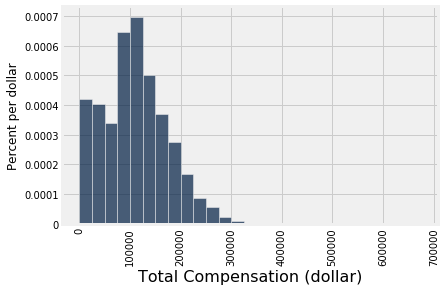

In [15]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=comp_bins, unit='dollar')

In [16]:
sample_from_population = sf.sample(200, with_replacement=False)
sample_from_population.show(3)

In [17]:
percentile(50,sample_from_population.column('Total Compensation'))

109867.13

In [18]:
percentile(50,sf.column('Total Compensation'))

107219.48

In [19]:
np.median(sample_from_population.column('Total Compensation'))

110162.89

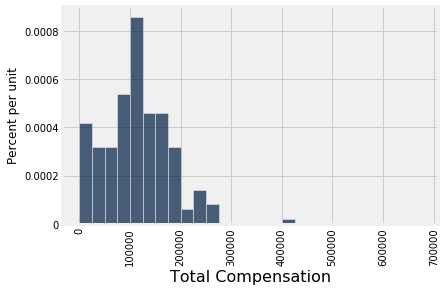

In [21]:
sample_from_population.hist('Total Compensation', bins=comp_bins)

## Sample variability

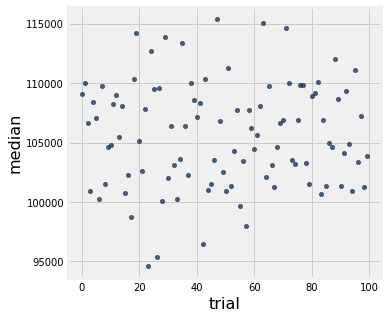

In [22]:
medians = make_array()
repetitions = np.arange(100)
for i in repetitions:
    sample = sf.sample(200, with_replacement=False)
    median = percentile(50,sample.column('Total Compensation'))
    medians = np.append(medians, median)

Table().with_columns('trial', repetitions, 'median', medians).scatter('trial')

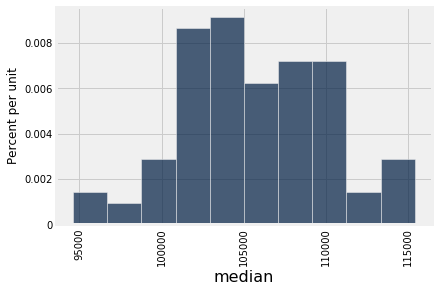

In [23]:
Table().with_columns('median', medians).hist()

In [24]:
percentile(2.5, medians)

96453.56

In [25]:
percentile(97.5, medians)

114664.67

In [26]:
print("95% of sample medians were between", 
      percentile(2.5, medians),
      "and",
      percentile(97.5, medians))

95% of sample medians were between 96453.56 and 114664.67


## Bootstrap

In [27]:
sample_from_population # From now on, this is all we have.

Organization Group                       | Job                            | Total Compensation
Public Protection                        | Deputy Sheriff                 | 169,877
Human Welfare & Neighborhood Development | Child Support Officer II       | 113,979
Public Protection                        | Head Atty, Civil & Criminal    | 32,073
General Administration & Finance         | Custodian                      | 87,475
Public Works, Transportation & Commerce  | Water Operations Analyst       | 177,552
Community Health                         | Environmental Health Inspector | 155,336
Public Protection                        | Police Officer 2               | 194,628
Public Protection                        | Police Officer 2               | 183,225
Community Health                         | Junior Administrative Analyst  | 65,613
Public Protection                        | Deputy Sheriff                 | 141,339
... (190 rows omitted)

In [28]:
percentile(50,sample_from_population.column('Total Compensation'))

109867.13

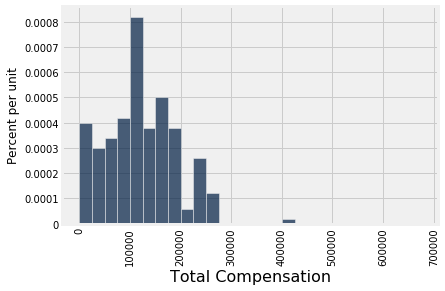

In [30]:
resample_1 = sample_from_population.sample()
resample_1.hist('Total Compensation', bins=comp_bins)

In [31]:
percentile(50,resample_1.column('Total Compensation'))

115413.47

108500.32

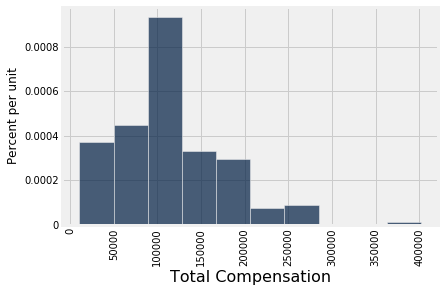

In [32]:
resample_2 = sample_from_population.sample()
resample_2.hist('Total Compensation')
percentile(50,resample_2.column('Total Compensation'))

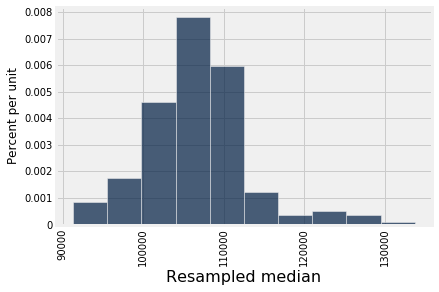

In [34]:
resampled_medians = make_array()
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = percentile(50,resample.column('Total Compensation'))
    resampled_medians = np.append(resampled_medians, median)
    
Table().with_column('Resampled median', resampled_medians).hist()

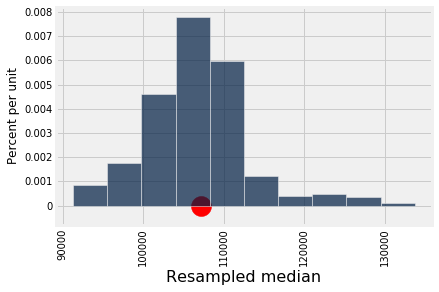

In [35]:
Table().with_column('Resampled median', resampled_medians).hist()
# True population median
pop_median = percentile(50,sf.column("Total Compensation"))
plots.scatter(pop_median, 0, color='red', s=400)

## Confidence Intervals

In [36]:
print("95% of resampled medians were between", 
      percentile(2.5, resampled_medians),
      "and",
      percentile(97.5, resampled_medians))

95% of resampled medians were between 95308.8 and 124156.43


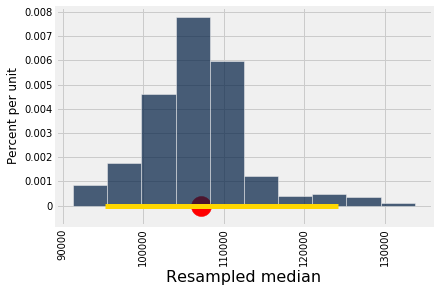

In [37]:
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist(0)
plots.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = percentile(50,sf.column('Total Compensation'))
plots.scatter(pop_median, 0, color='red', s=400)

In [ ]:
resampled_medians = make_array()
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = percentile(50,resample.column('Total Compensation'))
    resampled_medians = np.append(resampled_medians, median)
    
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = percentile(50,sf.column('Total Compensation'))
plots.scatter(pop_median, 0, color='red', s=400)

In [38]:
# This simulation takes several minutes

intervals = Table(['Lower', 'Upper'])

for j in np.arange(100):
    sample_from_population = sf.sample(200, with_replacement=False)
    resampled_medians = make_array()
    for i in np.arange(1000):
        resample = sample_from_population.sample()
        median = percentile(50,resample.column('Total Compensation'))
        resampled_medians = np.append(resampled_medians, median)

    interval_95 = [percentile(2.5, resampled_medians),
                   percentile(97.5, resampled_medians)]

    intervals.append(interval_95)
    print('trial number', j, 'of 100')

trial number 0 of 100
trial number 1 of 100
trial number 2 of 100
trial number 3 of 100
trial number 4 of 100
trial number 5 of 100
trial number 6 of 100
trial number 7 of 100
trial number 8 of 100
trial number 9 of 100
trial number 10 of 100
trial number 11 of 100
trial number 12 of 100
trial number 13 of 100
trial number 14 of 100
trial number 15 of 100
trial number 16 of 100
trial number 17 of 100
trial number 18 of 100
trial number 19 of 100
trial number 20 of 100
trial number 21 of 100
trial number 22 of 100
trial number 23 of 100
trial number 24 of 100
trial number 25 of 100
trial number 26 of 100
trial number 27 of 100
trial number 28 of 100
trial number 29 of 100
trial number 30 of 100
trial number 31 of 100
trial number 32 of 100
trial number 33 of 100
trial number 34 of 100
trial number 35 of 100
trial number 36 of 100
trial number 37 of 100
trial number 38 of 100
trial number 39 of 100
trial number 40 of 100
trial number 41 of 100
trial number 42 of 100
trial number 43 of 10

In [39]:
truth = percentile(50,sf.column('Total Compensation'))
correct = intervals.where('Lower', are.not_above(truth)).where('Upper', are.not_below(truth))
correct.num_rows

95